# Exploration des données

## Dataset principal train

In [3]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import glob

path_annotrain = "../datasets/datasets_train/train_annotation/_annotation.csv"

train_annotation = pd.read_csv(path_annotrain, index_col=0)

In [17]:
train_annotation.head()

,im_name,x_min,y_min,x_max,y_max,class,models
0,107347968.jpg,40.0,244.0,1144.0,637.0,car,Audi S5 Convertible 2012
1,91160576.jpg,4.0,9.0,98.0,76.0,car,Audi 100 Wagon 1994
2,273809408.jpg,16.0,4.0,288.0,191.0,car,Cadillac SRX SUV 2012
3,579534848.jpg,14.0,23.0,255.0,178.0,car,Ford Freestar Minivan 2007
4,950599680.jpg,4.0,70.0,321.0,215.0,car,Rolls-Royce Phantom Sedan 2012


### Répartition des classes

In [8]:
train_annotation["class"].value_counts().to_frame()

,class
car,1309
Person,135
Eye,77
Food,53
Dog,43
...,...
Parachute,1
High heels,1
Lizard,1
Sink,1


Remarquons que près de la moitié des images ne sont pas des 

In [18]:
train_annotation[train_annotation["models"]!=" "]["models"].value_counts().to_frame()

,models
Volvo XC90 SUV 2007,25
Volkswagen Beetle Hatchback 2012,21
Audi A5 Coupe 2012,20
Hyundai Genesis Sedan 2012,20
Mercedes-Benz 300-Class Convertible 1993,20
...,...
Chevrolet TrailBlazer SS 2009,7
Aston Martin Virage Convertible 2012,7
Jeep Grand Cherokee SUV 2012,7
Mercedes-Benz Sprinter Van 2012,4


In [7]:
files = pd.Series(glob.glob("../datasets/datasets_train/car_models_database_train/*")).apply(lambda x: x.split("/")[-1].split("_")[-2])
files.value_counts().to_frame()

,0
Audi A5 Coupe 2012,20
Audi S5 Convertible 2012,19
Ford Expedition EL SUV 2009,18
Chevrolet Corvette ZR1 2012,17
Bentley Continental GT Coupe 2007,17
Acura ZDX Hatchback 2012,16
Audi TT RS Coupe 2012,16
Chevrolet Camaro Convertible 2012,15
AM General Hummer SUV 2000,15
Hyundai Veracruz SUV 2012,15


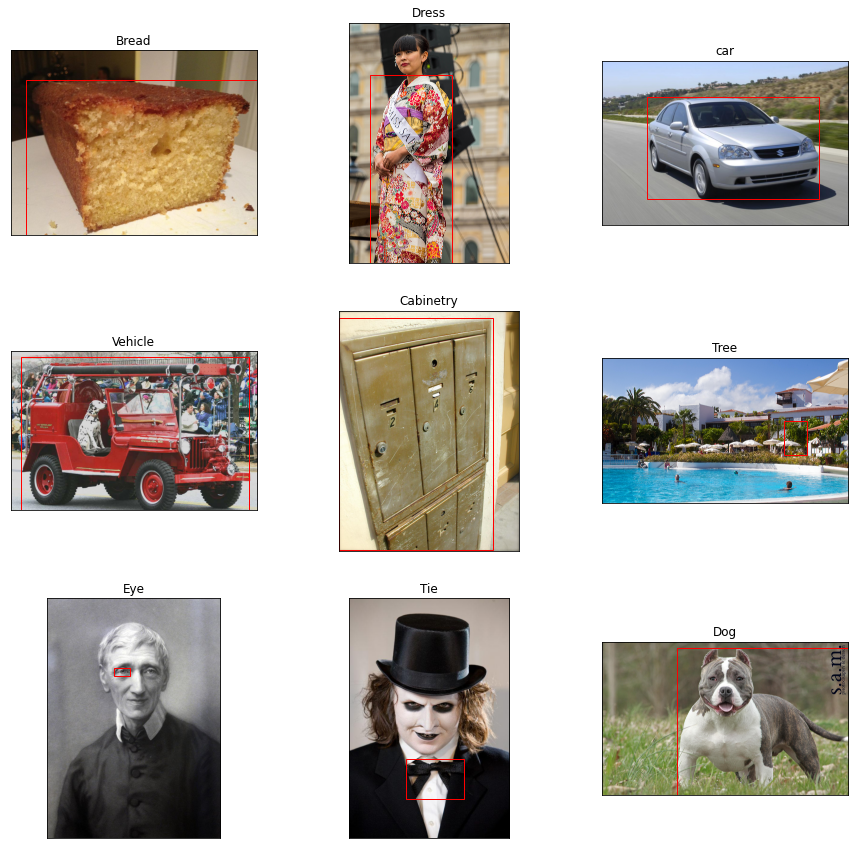

In [32]:
fig = plt.figure(figsize=(15,15))
i=1

for img_path in train_annotation.sample(9).iterrows():
    ax = fig.add_subplot(3,3,i)
    im = np.asanyarray(Image.open("../datasets_train/train/"+img_path[1]["im_name"]))
    x1, y1, x2, y2 = img_path[1][["x_min","y_min","x_max","y_max"]]
    # Create a Rectangle patch
    rect = patches.Rectangle(
        (x1, y1), x2 - x1, y2 - y1, linewidth=1, edgecolor="r", facecolor="none"
    )

    # Add the patch to the Axes
    ax.add_patch(rect)
    ax.imshow(im)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(img_path[1]["class"])
    i+=1
plt.show()